# EXERCICE 7 : REGRESSION LINEAIRE MULTIPLE AVEC REGULARISATION + VALIDATION CROISEE


Inspire de http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

#### Génération de donnée synthétiques...

In [3]:

np.random.seed(31)

#... definition de n et p
n = 75
p =  200   #remarque : n<200 => necessite de selectionner des variables

#... simulation de X
X = np.random.randn(n, p) #remarque : on ne tient pas en compte les $beta_0$

#... generation du vecteur beta dans lequel seules 10 valeurs sont non-nulles
beta = 3 * np.random.randn(p)
inds = np.arange(p)
np.random.shuffle(inds)
beta[inds[10:]] = 0 

#... simulation de y 
y = np.dot(X, beta) + (2.0 * np.random.normal(size=n))


# REMARQUE IMPORTANTE : y ne dépend que des variables i pour lesquelles beta[i] est non-nul


# ... coupe en deux les donnees en donnees d'apprentissage et donnes test
thresh=n // 2
X_train = X[thresh:]
y_train = y[thresh:]
X_test = X[:thresh]
y_test = y[:thresh]


#### Régression linéaire avec régularisation Lasso ...


In [4]:

from sklearn.linear_model import Lasso

alpha = 0.5
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)


####  Représentation du résultat


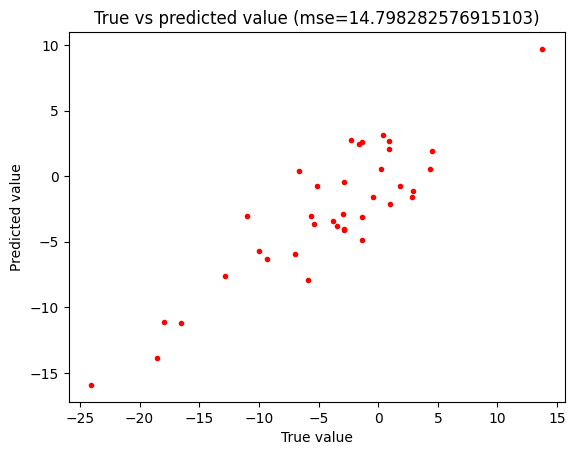

In [5]:
fig = plt.figure()
plt.plot(y_test, y_pred_lasso, 'r.')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs predicted value (mse='+str(mse_score_lasso)+')')
plt.show()



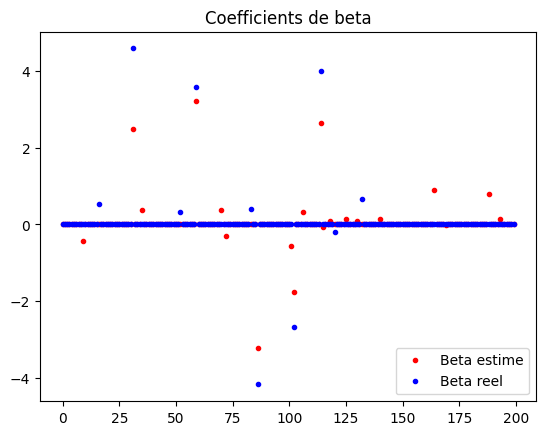

In [6]:

fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()



### <span style="color:blue">QUESTION 1</span> :

Jouez l'exemple avec  n=1000, n=100, n=75, n=50, n=25. Qu'en deduisez vous sur l'impact du nombre d'observations

### <span style="color:blue">REPONSE 1</span> :

Plus n est grand plus l'estimation des beta est bonne ?



### <span style="color:blue">QUESTION 2</span> :

On garde n=75. Utilisez la validation croisee de type K-folds (typiquement 8-Folds) pour trouver le meilleur coefficient *alpha* au sens de la MSE. Pour chaque *alpha* testé, on gardera comme score la MSE moyenne obtenue sur tous les *folds*.

Remarque : la recherche d'un bon coefficient *alpha* pourra d'abord se faire sur une échelle exponentielle assez large (ex: 0.001, 0.01, 0.1, ...) puis être raffinée sur une échelle plus fine.  

### <span style="color:blue">REPONSE 2</span> :

In [7]:
from sklearn.model_selection import KFold

n_splits = 8
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

list_alpha = [0.25]

for alpha in list_alpha:
    mse_scores = []
    lasso_regressor = Lasso(alpha=alpha)

    for train_index, test_index in kf.split(X):
        X_tr, X_te = X[train_index], X[test_index]
        y_tr, y_te = y[train_index], y[test_index]

        lasso_regressor.fit(X_tr, y_tr)
        y_pred = lasso_regressor.predict(X_te)
        mse = mean_squared_error(y_te, y_pred)
        mse_scores.append(mse)

    # print(f"MSE moyen sur {n_splits} folds pour alpha {alpha}: {np.mean(mse_scores)}")


print("Le meilleur alpha est 0,25")


Le meilleur alpha est 0,25


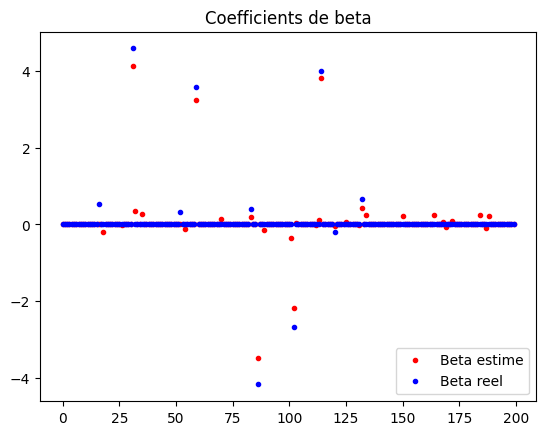

In [8]:
#représentation des coefficients estimés (lasso_regressor.coef_) et de ceux
#avec lesquels les données ont été simulées (beta)

# Réentrainer le modèle sur tout le tric
lasso_regressor = Lasso(alpha=0.25)
lasso_regressor.fit(X, y)


fig = plt.figure()
plt.plot(lasso_regressor.coef_, 'r.')
plt.plot(beta, 'b.')
plt.legend(('Beta estime', 'Beta reel'), loc='lower right')
plt.title('Coefficients de beta')
plt.show()


### <span style="color:blue">QUESTION 3</span> :

De manère alternative, codez et testez maintenant une sélection de type *forward* avec un critère de sélection *BIC*.

Comparez les résultats avec ceux obtenus à l'aide de la pénalisation LASSO.

### <span style="color:blue">REPONSE 3</span> :


MSE avec  1  variables :  57.16562955453347
MSE avec  2  variables :  37.512563461182005
MSE avec  3  variables :  24.268824829960394
MSE avec  4  variables :  20.623133216689006
MSE avec  5  variables :  18.12131342708672
MSE avec  6  variables :  15.655663779753855
MSE avec  7  variables :  13.61837889164762
MSE avec  8  variables :  12.316350957141518
MSE avec  9  variables :  10.803666474712365
MSE avec  10  variables :  9.699629361115202
MSE avec  11  variables :  8.959434373960717
MSE avec  12  variables :  8.180697556238208
MSE avec  13  variables :  7.49522763053288
MSE avec  14  variables :  6.201651206777953
MSE avec  15  variables :  5.627209377887502
MSE avec  16  variables :  5.055101315003592
MSE avec  17  variables :  4.525138970372891
MSE avec  18  variables :  3.9785494951198
MSE avec  19  variables :  3.714361595349564
MSE avec  20  variables :  3.5709460975297347
MSE avec  21  variables :  3.3788762143277897
MSE avec  22  variables :  3.2675768772131177
MSE avec  23 

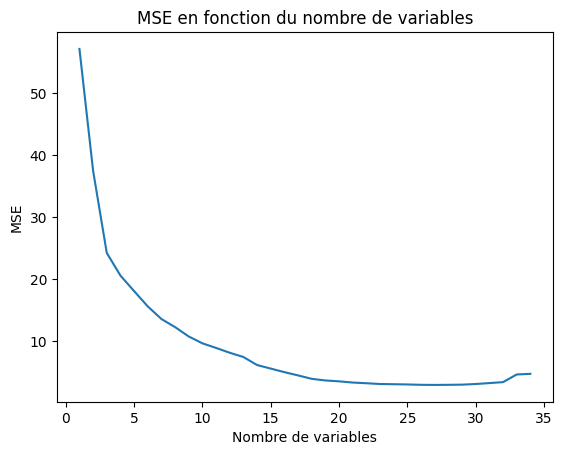

In [ ]:
from sklearn.linear_model import LinearRegression

def BIC(y_true, y_pred, n, q):
    return n * np.log(mean_squared_error(y_true, y_pred)) + np.log(n) * (q + 1)

p = X.shape[1]
n = X.shape[0]

q = 0
iter = 35

selected_variables = [False for i in range(p)]
MSE = []

lr = LinearRegression()

for q in range(1, iter):
    if q==1:
        list_MSE = np.full(p, np.inf)
        for i in range(p):
            lr.fit(X_train[:,i].reshape(-1,1), y_train)
            y_pred = lr.predict(X_test[:,i].reshape(-1,1))
            
            list_MSE[i] = (BIC(y_test, y_pred, n, q))

        best_var_index = np.argmin(list_MSE)
        selected_variables[best_var_index] = True

    else :
        X_train_temp = X_train[:, selected_variables]
        X_test_temp = X_test[:, selected_variables]
        list_MSE = np.full(p, np.inf)

        for i in range(p):
            
            if not selected_variables[i]:
                X_train_temp_loop = np.concatenate([X_train_temp, X_train[:,i].reshape(-1,1)], axis = 1)
                X_test_temp_loop = np.concatenate([X_test_temp, X_test[:,i].reshape(-1,1)], axis = 1)

                lr.fit(X_train_temp_loop, y_train)
                y_pred = lr.predict(X_test_temp_loop)
                    
                list_MSE[i] = (BIC(y_test, y_pred, n, q))

        best_var_index = np.argmin(list_MSE)
        selected_variables[best_var_index] = True

    lr.fit(X_train[:, selected_variables], y_train)
    y_pred = lr.predict(X_test[:, selected_variables])
    mse = mean_squared_error(y_test, y_pred)
    print("MSE avec ", q, " variables : ", mse)
    MSE.append(mse)

plt.plot(range(1, iter), MSE)
plt.xlabel("Nombre de variables")
plt.ylabel("MSE")
plt.title("MSE en fonction du nombre de variables")
plt.show()